In [1]:
import pandas as pd
import torch
from torch import nn
import numpy
import matplotlib.pyplot as plt
import seaborn 
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor, Compose, Lambda

##a)dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/deep_learning_hws/HWs/2/HW2_data/international_matches.csv')
df.iloc[-10:]

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


##b)scatter plot


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


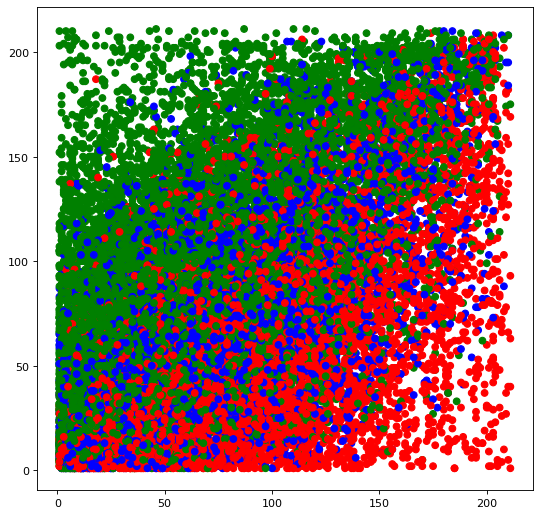

In [3]:
home_team_fifa_rank = list(df['home_team_fifa_rank'])
away_team_fifa_rank = list(df['away_team_fifa_rank'])

categories_df = df[['home_team_result']]
home_team_result_dic = {'Lose': 0, 'Draw':1, 'Win': 2}
categories_df.home_team_result = [home_team_result_dic[item] for item in categories_df.home_team_result]
categories = numpy.array(list(categories_df['home_team_result']))
colormap = numpy.array(['r', 'b', 'g'])

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(home_team_fifa_rank, away_team_fifa_rank, c=colormap[categories])
plt.show()

##c)data cleaning

In [4]:
df_cleaned = df[['home_team_total_fifa_points', 'home_team_fifa_rank','away_team_total_fifa_points', 'away_team_fifa_rank','home_team_result']]
drop_index = df_cleaned[ (df_cleaned['home_team_total_fifa_points'] == 0) | (df_cleaned['away_team_total_fifa_points'] == '0') ].index
df_cleaned.drop(drop_index , inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
# Data spliting Done in f step

##d)correlation heatmap

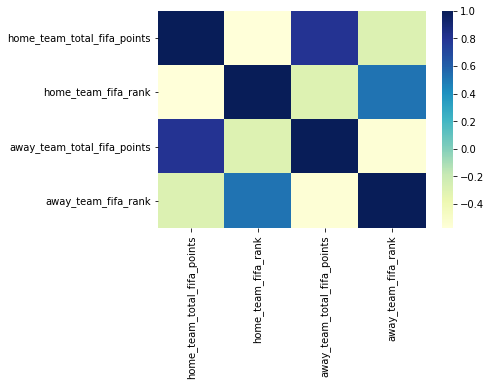

In [6]:
dataplot=seaborn.heatmap(df_cleaned.corr(), cmap="YlGnBu")
plt.show()

##e)Our Neural Network Architecture

In [7]:
import torch.nn as nn

# setting the device to cuda if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [8]:
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(MyNeuralNetwork, self).__init__()
        self.input_size = input_size
        self.MyNet= nn.Sequential(
            nn.Linear(self.input_size, 10),
            nn.ReLU(),
            nn.Linear(10,20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.ReLU(),
            nn.Linear(8, 3),
            nn.Softmax(dim = 1)
        )

    def forward(self, x):
        logits = self.MyNet(x)
        return logits

##f)Model Training and Testing

In [9]:
class My_train_Dataset(Dataset):
  def __init__(self):
    path_file='/content/drive/MyDrive/deep_learning_hws/HWs/2/HW2_data/international_matches.csv'
    df = pd.read_csv(path_file)
    df_cleaned = df[['home_team_total_fifa_points','away_team_total_fifa_points', 'home_team_fifa_rank', 'away_team_fifa_rank','home_team_result']]
    drop_index = df_cleaned[ (df_cleaned['home_team_total_fifa_points'] == 0) | (df_cleaned['away_team_total_fifa_points'] == '0') ].index
    df_cleaned.drop(drop_index , inplace=True)
    home_team_result_dic = {'Lose': 0, 'Draw':1, 'Win': 2}
    df_cleaned.home_team_result = [home_team_result_dic[item] for item in df_cleaned.home_team_result]

    self.X_train = df_cleaned.iloc[:int(.75*len(df_cleaned)),:-1].values
    self.Y_train = df_cleaned.iloc[:int(.75*len(df_cleaned)),-1].values

    self.X_train = torch.tensor(self.X_train, dtype =torch.float32)
    self.Y_train = torch.tensor(self.Y_train)


    # self.X_train = torch.nn.functional.normalize(self.X_train)
    self.Y_train = torch.nn.functional.one_hot(self.Y_train, num_classes=3).type(torch.float32)

    self.X_train = self.X_train.to(device)
    self.Y_train = self.Y_train.to(device)
  def __len__(self):
    return len(self.X_train)
  
  def __getitem__(self, idx):
    return self.X_train[idx], self.Y_train[idx]

    

In [10]:
class My_test_Dataset(Dataset):
  def __init__(self):
    path_file='/content/drive/MyDrive/deep_learning_hws/HWs/2/HW2_data/international_matches.csv'
    df = pd.read_csv(path_file)
    df_cleaned = df[['home_team_total_fifa_points','away_team_total_fifa_points', 'home_team_fifa_rank', 'away_team_fifa_rank','home_team_result']]
    drop_index = df_cleaned[ (df_cleaned['home_team_total_fifa_points'] == 0) | (df_cleaned['away_team_total_fifa_points'] == '0') ].index
    df_cleaned.drop(drop_index , inplace=True)
    home_team_result_dic = {'Lose': 0, 'Draw':1, 'Win': 2}
    df_cleaned.home_team_result = [home_team_result_dic[item] for item in df_cleaned.home_team_result]

    self.X_test = df_cleaned.iloc[int(.75*len(df_cleaned)):,:-1].values
    self.Y_test = df_cleaned.iloc[int(.75*len(df_cleaned)):,-1].values

    self.X_test = torch.tensor(self.X_test, dtype =torch.float32)
    self.Y_test = torch.tensor(self.Y_test)


    # self.X_test = torch.nn.functional.normalize(self.X_test)
    # self.Y_test = (torch.nn.functional.one_hot(self.Y_test, num_classes=3)).type(torch.float32)
    self.X_test = self.X_test.to(device)
    self.Y_test = self.Y_test.to(device)
  def __len__(self):
    return len(self.X_test)
  
  def __getitem__(self,idx):
    return self.X_test[idx], self.Y_test[idx]

In [11]:
training_data = My_train_Dataset()
test_data = My_test_Dataset()

In [12]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

In [13]:
model = MyNeuralNetwork(4).to(device)
model.train()

MyNeuralNetwork(
  (MyNet): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=3, bias=True)
    (7): Softmax(dim=1)
  )
)

In [14]:
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loss=[]
test_loss=[]
accuracy=[]
epochs = 50

for t in range(epochs):
    size = len(train_dataloader.dataset)
    for batch, (X, y) in enumerate(train_dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"train_loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


    size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    test_loss, correct = 0, 0
    i = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            i+=1
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"test_Accuracy: {(100*correct):>0.1f}%, test_Avg_loss: {test_loss:>8f} \n")

train_loss: 0.958687  [    0/ 7223]
train_loss: 0.896604  [ 3200/ 7223]
train_loss: 1.115338  [ 6400/ 7223]
test_Accuracy: 48.8%, test_Avg_loss: 1.062958 

train_loss: 0.947610  [    0/ 7223]
train_loss: 1.176690  [ 3200/ 7223]
train_loss: 1.044836  [ 6400/ 7223]
test_Accuracy: 48.8%, test_Avg_loss: 1.059257 

train_loss: 1.088491  [    0/ 7223]
train_loss: 1.143064  [ 3200/ 7223]
train_loss: 1.091877  [ 6400/ 7223]
test_Accuracy: 48.8%, test_Avg_loss: 1.062958 

train_loss: 1.230232  [    0/ 7223]
train_loss: 1.069994  [ 3200/ 7223]
train_loss: 1.030809  [ 6400/ 7223]
test_Accuracy: 48.8%, test_Avg_loss: 1.064192 

train_loss: 1.020576  [    0/ 7223]
train_loss: 1.064544  [ 3200/ 7223]
train_loss: 1.134503  [ 6400/ 7223]
test_Accuracy: 48.8%, test_Avg_loss: 1.062958 

train_loss: 1.216553  [    0/ 7223]
train_loss: 1.004368  [ 3200/ 7223]
train_loss: 1.064399  [ 6400/ 7223]
test_Accuracy: 48.8%, test_Avg_loss: 1.064192 

train_loss: 1.090859  [    0/ 7223]
train_loss: 1.188873  [ 3200

In [15]:
torch.save(model.state_dict(), '/content/drive/MyDrive/deep_learning_hws/HWs/2/P2_checkpoints/model_weights.pth')

##g)Predicting the results of the Iranian team's matches

In [16]:
IRAN_matchs_fifa2022 = pd.DataFrame(columns=['home_team_total_fifa_points', 'home_team_fifa_rank','away_team_total_fifa_points','away_team_fifa_rank' ])
away_team_total_fifa_points=[]
home_team_total_fifa_points=[]
away_team_fifa_rank=[]
home_team_fifa_rank=[]
away_teams = ['Wales', 'USA', 'England']
for t_name in away_teams:
  away_data = df[ (df['away_team'] == t_name) ]
  home_data = df[ (df['home_team'] == 'IR Iran') ]
  home_team_total_fifa_points.append(home_data.iloc[-1]['home_team_total_fifa_points'])
  home_team_fifa_rank.append(home_data.iloc[-1]['home_team_fifa_rank'])
  away_team_total_fifa_points.append(away_data.iloc[-1]['away_team_total_fifa_points'])
  away_team_fifa_rank.append(away_data.iloc[-1]['away_team_fifa_rank'])

IRAN_matchs_fifa2022['home_team_total_fifa_points'] = home_team_total_fifa_points
IRAN_matchs_fifa2022['away_team_total_fifa_points'] = away_team_total_fifa_points
IRAN_matchs_fifa2022['home_team_fifa_rank'] = home_team_fifa_rank
IRAN_matchs_fifa2022['away_team_fifa_rank'] = away_team_fifa_rank

In [17]:
X = (torch.tensor(IRAN_matchs_fifa2022.to_numpy(), dtype =torch.float32)).to(device)
prediction = model(X)
prediction = prediction.argmax(1)
result_dic = {0:'Lose', 1:'Draw', 2:'Win'}
print('for Iran IR-Wales result: {}, IR-USA result: {}, IR-England result: {}'.format(result_dic[prediction[0].item()], result_dic[prediction[1].item()], result_dic[prediction[2].item()]))

for Iran IR-Wales result: Win, IR-USA result: Win, IR-England result: Win
